In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import statistics

In [2]:
data = pd.read_csv(r"D:\github\distance based\iris_csv.csv")

In [3]:
print(data)

     sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
data.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [5]:
setosa=[]
versicolor=[]
virginica=[]

In [6]:
for index, rows in data.iterrows():
    if 'setosa' in rows[4]:
        setosa.append([rows[0],rows[1],rows[2],rows[3]])
    if 'versicolor' in rows[4]:
        versicolor.append([rows[0],rows[1],rows[2],rows[3]])
    if 'virginica' in rows[4]:
        virginica.append([rows[0],rows[1],rows[2],rows[3]])
    

In [7]:
#training data randomly
train_setosa = random.sample(setosa,30)
train_versicolor=random.sample(versicolor,30)
train_virginica= random.sample(virginica,30)

In [8]:
#centroid of training class
centroid_setosa=np.mean(train_setosa, axis=0)
print(centroid_setosa)
centroid_versicolor=np.mean(train_versicolor, axis=0)
print(centroid_versicolor)
centroid_virginica=np.mean(train_virginica, axis=0)
print(centroid_virginica)

[4.95666667 3.39333333 1.46666667 0.24333333]
[5.90666667 2.80666667 4.26666667 1.31333333]
[6.66       3.00333333 5.64666667 2.04333333]


In [9]:
#finding difference between two list
def Diff(li1, li2):
    lists = [i for i in li1 if  i not in li2]
    return lists



In [10]:
#testing
test_setosa = Diff(setosa, train_setosa)
test_versicolor = Diff(versicolor, train_versicolor)
test_virginica = Diff(virginica, train_virginica)

In [11]:
#finding euclidean distance
def euclidean_distance(p,q):
    distance=0
    p=np.asarray(p)
    q=np.asarray(q)
    
    for i in range(4):
        distance = distance + (np.square(p[i] - q[i]))
                                        
    return np.sqrt(distance)


In [12]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = euclidean_distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = euclidean_distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = euclidean_distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = euclidean_distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = euclidean_distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = euclidean_distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = euclidean_distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = euclidean_distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = euclidean_distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.13333333333333333
56.477
57.68513059317168
57.68513059317168


In [13]:
#finding chess board distance
def chess_board(p,q):
    d = 0
    p=np.asarray(p)
    q=np.asarray(q)
    for i in range(4):
        tmp=np.abs(p[i] - q[i])
        if( tmp >  d): 
            d = tmp
    return d

In [14]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = chess_board(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = chess_board(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = chess_board(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = chess_board(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = chess_board(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = chess_board(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = chess_board(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = chess_board(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = chess_board(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.13333333333333333
30.655666666666647
42.34999999999999
42.34999999999999


In [15]:
#finding city block distance
def city_block(p,q):
    d = 0
    p=np.asarray(p)
    q=np.asarray(q)
    for m in range(4):
        d = d + abs(p[m] - q[m])
    return d


In [16]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = city_block(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = city_block(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min=d2
    d3 = city_block(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = city_block(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = city_block(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = city_block(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = city_block(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = city_block(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = city_block(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.13333333333333333
156.92900000000006
96.55000000000004
96.55000000000004


In [17]:
#for Mahalanobis Distance we need covariance
co_setosa = np.cov(np.transpose(train_setosa))
co_versicolor = np.cov(np.transpose(train_versicolor))
co_virginica = np.cov(np.transpose(train_virginica))
def Mahalanobis_Distance(p,q,cov):
    d=np.subtract(p,q)
    d=round(np.dot(np.dot(d,np.linalg.inv(cov)),np.transpose(d)))
    return d

In [18]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = Mahalanobis_Distance(i,centroid_setosa,co_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Mahalanobis_Distance(i,centroid_versicolor,co_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Mahalanobis_Distance(i,centroid_virginica,co_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = Mahalanobis_Distance(i,centroid_setosa,co_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Mahalanobis_Distance(i,centroid_versicolor,co_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Mahalanobis_Distance(i,centroid_virginica,co_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = Mahalanobis_Distance(i,centroid_setosa,co_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Mahalanobis_Distance(i,centroid_versicolor,co_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Mahalanobis_Distance(i,centroid_virginica,co_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square
mean_absolute = mean_absolute
error_dist = error_dist
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.05
299
27
27


In [19]:
# for Minkowski Distance
def Minkowski_Distance(p,q):
    d=0
    p= np.asarray(p)
    q= np.asarray(q)
    n = random.randint(1,2)
    for m in range(4):
        d = d + np.power(abs(p[m] - q[m]),n)
    d = np.power(d,1/n)
    return d

In [20]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = Minkowski_Distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Minkowski_Distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Minkowski_Distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = Minkowski_Distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Minkowski_Distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Minkowski_Distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = Minkowski_Distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Minkowski_Distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Minkowski_Distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.06666666666666667
86.07266666666676
69.06957292943017
69.06957292943017


In [21]:
#for Correlation Distance
def Correlation_Distance(p,q):
    x1=0
    x2=0
    x3=0
    p=np.asarray(p)
    q=np.asarray(q)
    mean=[centroid_setosa,centroid_versicolor,centroid_virginica]
    mean=np.mean(mean,axis=0)
    for i in range(4):
        x1 = x1 + ((p[i]-mean[i])*(q[i] - mean[i]))
    for i in range(4):
        x2 = x2 + pow((p[i] - mean[i]),2)
        x3 = x3 + pow((q[i] - mean[i]),2)
    m = x2*x3
    m = np.sqrt(m)
    d = 1 - (x1/m)
    return d

In [22]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = Correlation_Distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Correlation_Distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Correlation_Distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = Correlation_Distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Correlation_Distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Correlation_Distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = Correlation_Distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = Correlation_Distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = Correlation_Distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.2833333333333333
5.003207139959276
11.006624260813279
11.006624260813279


In [23]:
#for Cosine Distance
def cosin_distance(p,q):
    numerator = 0
    sum_x = 0
    sum_y = 0
    p=np.asarray(p)
    q=np.asarray(q)
    for i in range(4):
        numerator += np.sum([p * q])
        sum_x += np.sum([p**2])
        sum_y += np.sum([q**2])
    denominator = np.round(np.sqrt(sum_x) * np.sqrt(sum_y))
    return numerator / denominator

In [24]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = cosin_distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = cosin_distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = cosin_distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = cosin_distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = cosin_distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = cosin_distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = cosin_distance(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = cosin_distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = cosin_distance(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.9666666666666667
48.61173147486566
53.990032214853734
53.990032214853734


In [25]:
#for Bray-Curtis Distance
def bray_curtis(p,q):
    a=0
    b=0
    p=np.asarray(p)
    q=np.asarray(q)
    for i in range(4):
        sub = a + abs(p[i] - q[i])
        add = b + abs(p[i]+p[i])
    d = sub/add
    return d


In [26]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = bray_curtis(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = bray_curtis(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = bray_curtis(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = bray_curtis(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = bray_curtis(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = bray_curtis(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = bray_curtis(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = bray_curtis(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = bray_curtis(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)



0.05
0.18796826796562258
3.215343915343916
3.215343915343916


In [27]:
# for canberra distance
def canberra(p,q):
    d=0
    p=np.asarray(p)
    q=np.asarray(q)
    for i in range(4):
        sub = abs(p[i]-q[i])
        add = abs(p[i]+q[i])
        d = d + (sub/add)
    return d


In [28]:
#finding error
error = 0
mean_square = 0
mean_absolute = 0
error_dist=0
#for setosa
for i in test_setosa:
    d1 = canberra(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = canberra(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = canberra(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'setosa'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
        
#for versicolor
for i in test_versicolor:
    d1 = canberra(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = canberra(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = canberra(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'versicolor'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#for virginica
for i in test_virginica:
    d1 = canberra(i,centroid_setosa)
    min_dist=d1
    set_class = 'setosa'
    d2 = cosin_distance(i,centroid_versicolor)
    if min_dist>d2:
        set_class = 'versicolor'
        min_dist=d2
    d3 = canberra(i,centroid_virginica)
    if min_dist>d3:
        set_class = 'virginica'
        min_dist=d3
    if (set_class != 'virginica'):
        error +=  1
        error_dist += min_dist
        mean_square += np.square(min_dist)
        mean_absolute += abs(min_dist)
#finding values
error = error/60
mean_square = mean_square/error
mean_absolute = mean_absolute/error
error_dist = error_dist/error
print(error)
print(mean_square)
print(mean_absolute)
print(error_dist)


0.03333333333333333
3.6708674420530314
14.827384240151815
14.827384240151815


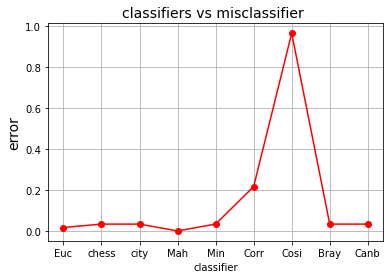

In [29]:
#based on error
classifier = ['Euc','chess','city','Mah','Min','Corr','Cosi','Bray','Canb']
errors = [0.016666666666666666,0.03333333333333333,0.03333333333333333,0.0,0.03333333333333333,0.21666666666666667,0.9666666666666667,0.03333333333333333,0.03333333333333333]
  
plt.plot(classifier,errors, color='red', marker='o')
plt.title('classifiers vs misclassifier ', fontsize=14)
plt.xlabel('classifier', fontsize=10)
plt.ylabel('error', fontsize=14)
plt.grid(True)
plt.show()

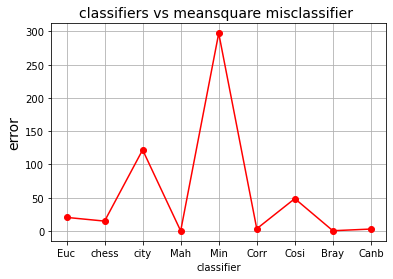

In [30]:
#based on mean square error   
classifier = ['Euc','chess','city','Mah','Min','Corr','Cosi','Bray','Canb']
errors = [20.345999999999965,14.752666666666657,121.89666666666679,0.0,297.35599999999994,3.2739937174244607,48.58867579195914,0.28272794411882385,2.8035344948810725]
plt.plot(classifier,errors, color='red', marker='o')
plt.title('classifiers vs meansquare misclassifier ', fontsize=14)
plt.xlabel('classifier', fontsize=10)
plt.ylabel('error', fontsize=14)
plt.grid(True)
plt.show()

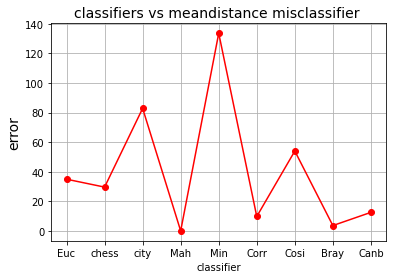

In [31]:
#based on mean distance error   
classifier = ['Euc','chess','city','Mah','Min','Corr','Cosi','Bray','Canb']
errors = [34.93937606769757,29.59999999999999,82.80000000000003,0,133.56896865252614,9.754891178836095,53.978391773169335,3.6155462184873928,12.543431049125823]
plt.plot(classifier,errors, color='red', marker='o')
plt.title('classifiers vs meandistance misclassifier ', fontsize=14)
plt.xlabel('classifier', fontsize=10)
plt.ylabel('error', fontsize=14)
plt.grid(True)
plt.show()